In [1]:
import os


In [2]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve, log_loss, recall_score, precision_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [3]:
from data_preprocessing import load_data
from utils import plt_roc

D:\Anaconda\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [4]:
TRAIN_PATH = 'train/train1101Lemma.csv'
OUTPUT_PATH = 'train/predicted.csv'
#best b = 0.22, best C = 3, best f1 = 0.6291
#best b = 0.24, best C = 2, best f1 = 0.6309943333991147

In [5]:
def prepare_data():
    data = load_data(TRAIN_PATH)
    
    tfidf = TfidfVectorizer(ngram_range = (1,2))
    feature_matrix = tfidf.fit_transform(data['question_text'].values.astype('U'))
    
    return train_test_split(feature_matrix, data['target'], test_size = 0.2, shuffle = False)
    

In [10]:
def fit_train_data(train_x, train_y, test_x, test_y):
    train1_x, valid_x, train1_y, valid_y = train_test_split(train_x, train_y, test_size = 0.2, shuffle = False)
    '''C = [0.3, 1, 3, 10, 30, 100]
    best_c = 0
    best_f1 = 0
    for c in tqdm(C):
        lr = LogisticRegression(solver="liblinear", penalty="l1", C = c)
        model = lr.fit(train_x, train_y)
        pred_y = model.predict_proba(valid_x)[:,1]
        pred_y = np.where(pred_y>0.3, 1, 0)
        print(c)
        print(confusion_matrix(valid_y, pred_y))
        temp_f1 = f1_score(valid_y, pred_y)
        print(temp_f1)
        plt_roc(valid_y, pred_y)
        if(temp_f1 > best_f1):
            best_c = c
            best_f1 = temp_f1
    print("best C: ", best_c)'''
    model = LogisticRegression(solver="liblinear", penalty="l1", C = 2).fit(train_x, train_y)
    '''B = np.arange(0.2,0.8,0.02)
    best_b = 0
    best_f1 = 0
    for b in tqdm(B):
        pred_y = model.predict_proba(test_x)[:,1]
        pred_y = np.where(pred_y > b, 1, 0)
        temp_f1 = f1_score(test_y, pred_y)
        print(b)
        print(confusion_matrix(test_y, pred_y))
        print(temp_f1)
        plt_roc(test_y, pred_y)
        if(temp_f1 > best_f1):
            best_f1 = temp_f1
            best_b = b
    print("best B:", best_b)'''
    pred_y = model.predict_proba(test_x)[:,1]
    pred_y = np.where(pred_y > best_b, 1, 0)
    print(confusion_matrix(test_y, pred_y))
    print(f1_score(test_y, pred_y))
    plt_roc(test_y, pred_y)

In [7]:
data = load_data(TRAIN_PATH)
    
tfidf = TfidfVectorizer(ngram_range = (1,2))
feature_matrix = tfidf.fit_transform(data['question_text'].values.astype('U'))
train_x, test_x, train_y, test_y = train_test_split(feature_matrix, data['target'], test_size = 0.2, shuffle = False)

(1044897, 3091948)
(1044897,)
(261225, 3091948)
(261225,)


  0%|                                                                                           | 0/31 [00:00<?, ?it/s]

0.2
[[235326   9629]
 [  4387  11883]]
0.6290296966809592


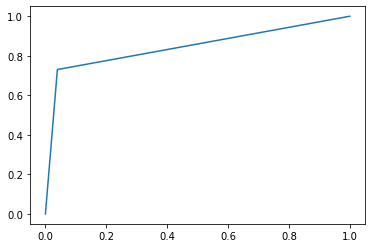

  3%|██▋                                                                                | 1/31 [00:01<00:50,  1.68s/it]

0.22
[[236211   8744]
 [  4751  11519]]
0.6306079435031341


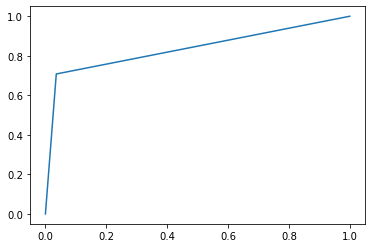

  6%|█████▎                                                                             | 2/31 [00:03<00:50,  1.74s/it]

0.24
[[236945   8010]
 [  5079  11191]]
0.6309943333991147


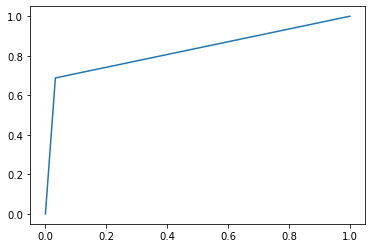

 10%|████████                                                                           | 3/31 [00:05<00:48,  1.72s/it]

0.26
[[237590   7365]
 [  5389  10881]]
0.6304902074400278


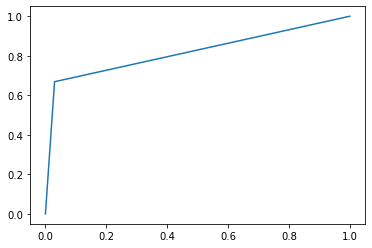

 13%|██████████▋                                                                        | 4/31 [00:06<00:45,  1.67s/it]

0.27999999999999997
[[238156   6799]
 [  5709  10561]]
0.6280701754385964


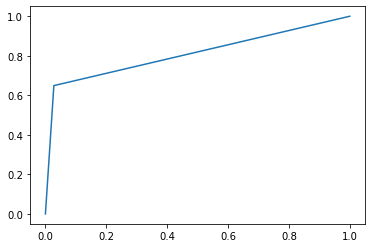

 16%|█████████████▍                                                                     | 5/31 [00:08<00:42,  1.63s/it]

0.29999999999999993
[[238663   6292]
 [  6021  10249]]
0.6247295114443326


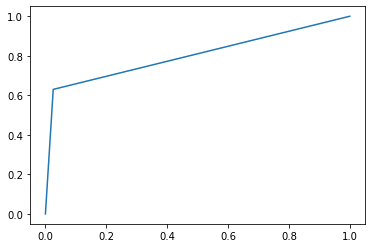

 19%|████████████████                                                                   | 6/31 [00:09<00:39,  1.59s/it]

0.31999999999999995
[[239078   5877]
 [  6295   9975]]
0.6210696718759728


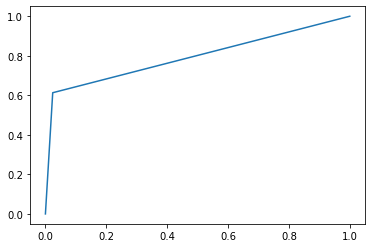

 23%|██████████████████▋                                                                | 7/31 [00:11<00:37,  1.54s/it]

0.33999999999999997
[[239497   5458]
 [  6571   9699]]
0.6172399529067362


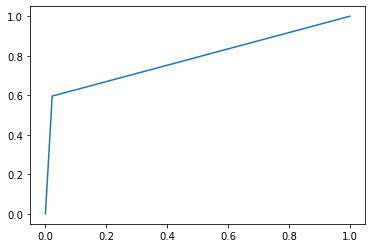

 26%|█████████████████████▍                                                             | 8/31 [00:12<00:34,  1.51s/it]

0.35999999999999993
[[239837   5118]
 [  6823   9447]]
0.6127452570131343


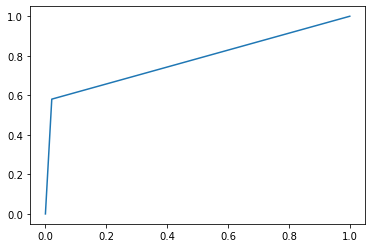

 29%|████████████████████████                                                           | 9/31 [00:13<00:31,  1.44s/it]

0.3799999999999999
[[240176   4779]
 [  7113   9157]]
0.6063033834337549


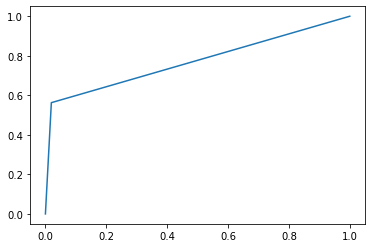

 32%|██████████████████████████▍                                                       | 10/31 [00:15<00:29,  1.41s/it]

0.3999999999999999
[[240471   4484]
 [  7350   8920]]
0.6011997034440926


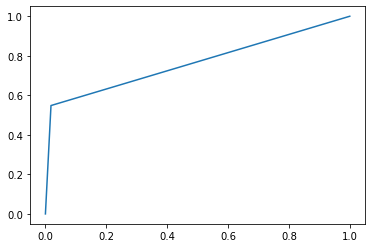

 35%|█████████████████████████████                                                     | 11/31 [00:16<00:27,  1.37s/it]

0.41999999999999993
[[240772   4183]
 [  7619   8651]]
0.5944887300714679


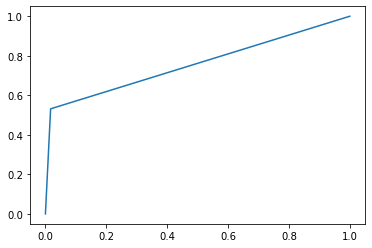

 39%|███████████████████████████████▋                                                  | 12/31 [00:18<00:27,  1.43s/it]

0.4399999999999999
[[241020   3935]
 [  7880   8390]]
0.5868158769015562


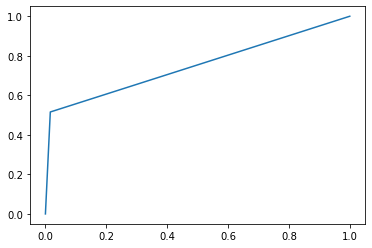

 42%|██████████████████████████████████▍                                               | 13/31 [00:19<00:25,  1.44s/it]

0.4599999999999999
[[241274   3681]
 [  8139   8131]]
0.5790898084182038


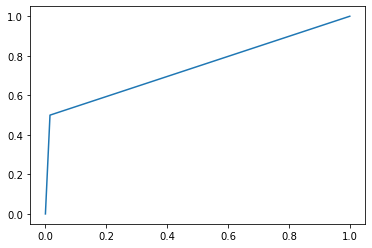

 45%|█████████████████████████████████████                                             | 14/31 [00:21<00:25,  1.53s/it]

0.47999999999999987
[[241508   3447]
 [  8379   7891]]
0.5716458997392061


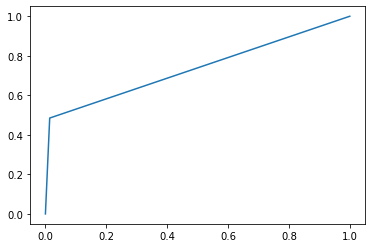

 48%|███████████████████████████████████████▋                                          | 15/31 [00:23<00:27,  1.75s/it]

0.49999999999999983
[[241724   3231]
 [  8643   7627]]
0.562297257446181


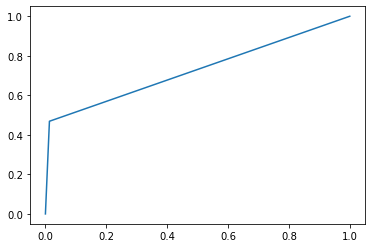

 52%|██████████████████████████████████████████▎                                       | 16/31 [00:25<00:26,  1.77s/it]

0.5199999999999998
[[241918   3037]
 [  8909   7361]]
0.5520473976301183


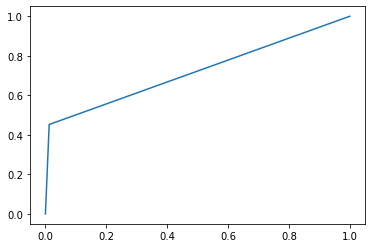

 55%|████████████████████████████████████████████▉                                     | 17/31 [00:27<00:24,  1.78s/it]

0.5399999999999998
[[242118   2837]
 [  9193   7077]]
0.5405591200733272


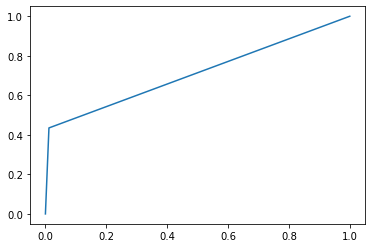

 58%|███████████████████████████████████████████████▌                                  | 18/31 [00:28<00:22,  1.71s/it]

0.5599999999999998
[[242291   2664]
 [  9444   6826]]
0.5299689440993789


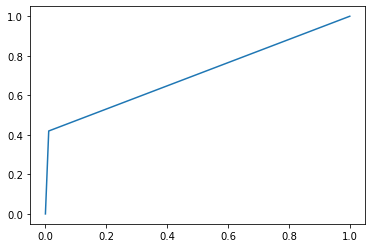

 61%|██████████████████████████████████████████████████▎                               | 19/31 [00:30<00:20,  1.68s/it]

0.5799999999999998
[[242473   2482]
 [  9666   6604]]
0.5209023505284744


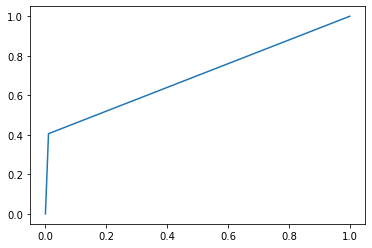

 65%|████████████████████████████████████████████████████▉                             | 20/31 [00:31<00:17,  1.60s/it]

0.5999999999999999
[[242634   2321]
 [  9929   6341]]
0.5086635648965185


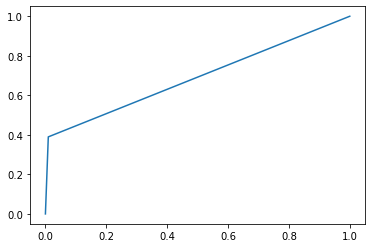

 68%|███████████████████████████████████████████████████████▌                          | 21/31 [00:33<00:15,  1.59s/it]

0.6199999999999999
[[242789   2166]
 [ 10193   6077]]
0.49581854526169794


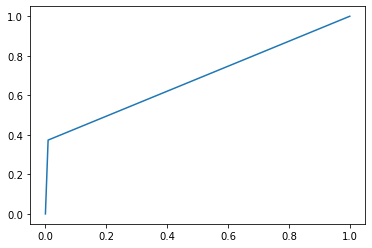

 71%|██████████████████████████████████████████████████████████▏                       | 22/31 [00:34<00:13,  1.54s/it]

0.6399999999999998
[[242948   2007]
 [ 10428   5842]]
0.48443136116754426


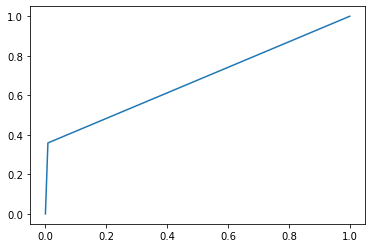

 74%|████████████████████████████████████████████████████████████▊                     | 23/31 [00:36<00:13,  1.64s/it]

0.6599999999999997
[[243107   1848]
 [ 10694   5576]]
0.47066767958132866


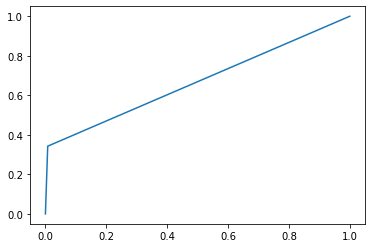

 77%|███████████████████████████████████████████████████████████████▍                  | 24/31 [00:38<00:11,  1.67s/it]

0.6799999999999997
[[243222   1733]
 [ 10949   5321]]
0.456268221574344


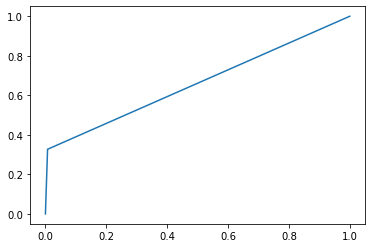

 81%|██████████████████████████████████████████████████████████████████▏               | 25/31 [00:40<00:11,  1.84s/it]

0.6999999999999997
[[243353   1602]
 [ 11214   5056]]
0.4410327983251919


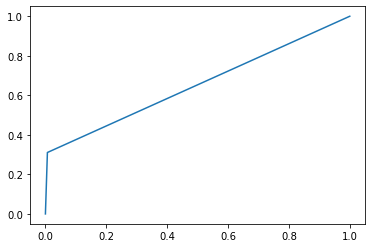

 84%|████████████████████████████████████████████████████████████████████▊             | 26/31 [00:42<00:08,  1.77s/it]

0.7199999999999998
[[243498   1457]
 [ 11467   4803]]
0.4263648468708389


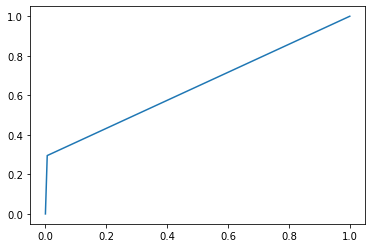

 87%|███████████████████████████████████████████████████████████████████████▍          | 27/31 [00:43<00:06,  1.65s/it]

0.7399999999999998
[[243630   1325]
 [ 11727   4543]]
0.4104255126931069


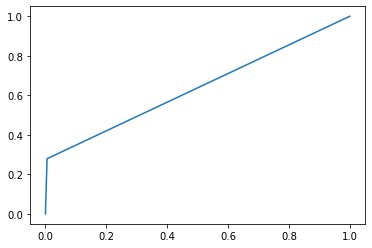

 90%|██████████████████████████████████████████████████████████████████████████        | 28/31 [00:45<00:04,  1.65s/it]

0.7599999999999998
[[243761   1194]
 [ 11997   4273]]
0.39315452914385607


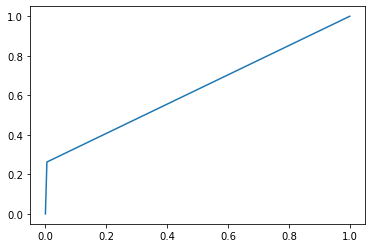

 94%|████████████████████████████████████████████████████████████████████████████▋     | 29/31 [00:47<00:03,  1.81s/it]

0.7799999999999998
[[243853   1102]
 [ 12298   3972]]
0.37218890554722633


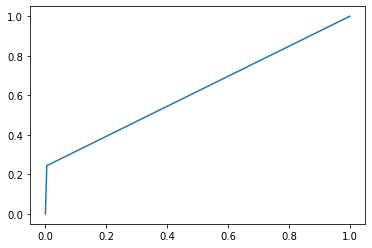

 97%|███████████████████████████████████████████████████████████████████████████████▎  | 30/31 [00:49<00:01,  1.84s/it]

0.7999999999999996
[[243968    987]
 [ 12562   3708]]
0.3537324111614596


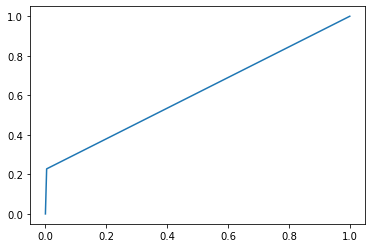

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:51<00:00,  1.66s/it]


best B: 0.24
[[236945   8010]
 [  5079  11191]]
0.6309943333991147


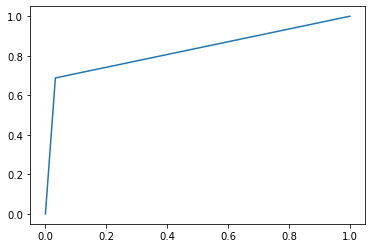

"data = load_data(TRAIN_PATH)\nprint(feature_matrix.shape)\nprint(data['target'].shape)\ntrain_x, test_x, train_y, test_y = train_test_split(feature_matrix, data['target'], test_size = 0.2, shuffle = False)\nfit_train_data(train_x, train_y, test_x, test_y)"

In [11]:
#train_x, test_x, train_y, test_y = prepare_data()
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
fit_train_data(train_x, train_y, test_x, test_y)
'''data = load_data(TRAIN_PATH)
print(feature_matrix.shape)
print(data['target'].shape)
train_x, test_x, train_y, test_y = train_test_split(feature_matrix, data['target'], test_size = 0.2, shuffle = False)
fit_train_data(train_x, train_y, test_x, test_y)'''

In [1]:
print((236945+11191)/(236945+8010+5079+11191))

0.949893769738731
